# Lab Tasks:
1.​ Use HeartDisease dataset and apply LinearRegression and then pass the result to sigmoid function (write from scratch) and then compare the accuracy of both models.

2.​ Calculate binary cross entropy loss on the above experiment. Write from scratch.

3.​ Download a new dataset from UCI Repository https://archive.ics.uci.edu/ml/datasets.php and evaluate its accuracy on 5 cross fold.

4.​ Consider a logistic regression model with w1=0.5 and w2=0.31 and b=0.09. X1 = 5, X2 = 3 and actual y is 1. Calculate this numerical by hand and verify your answers by coding the functions below.

Write below functions from scratch:

●​ ForwardPropagation()

●​ LossCalculation()

●​ BackwardPropagation() # This function must update the old weights

●​ MainLoop which must iterate 5 times and call all the above functions.

In [117]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv('heart_disease_dataset_UCI.csv')

# Data Pre Processing

In [118]:
X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

# Model Prediction

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=1.0,class_weight='balanced',max_iter=100,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [121]:
model1=lr.fit(X_train,y_train)
model1.score(X_train, y_train)


0.8458149779735683

In [122]:
prediction1=model1.predict(X_test)

<AxesSubplot: >

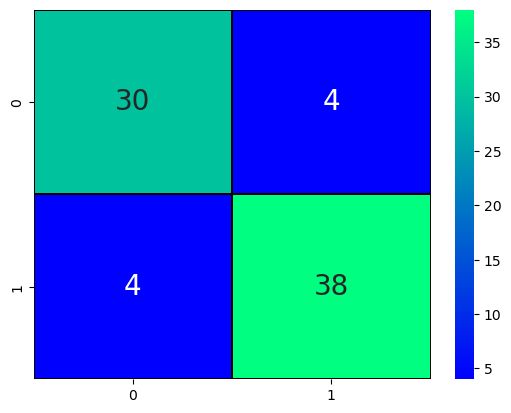

In [123]:
# Confusion Matrix
cm=confusion_matrix(y_test,prediction1)
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
linecolor='black',annot_kws={"size":20})

In [124]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8947368421052632
Testing Sensitivity for logistic Regression: 0.8823529411764706
Testing Specificity for Logistic Regression: 0.9047619047619048
Testing Precision for Logistic Regression 0.8823529411764706


Task-01

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

dataframe = pd.read_csv('heart_disease_dataset_UCI.csv')

X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]
X = X.values
y = y.values

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_test)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_pred_sigmoid = sigmoid(y_val_pred)

y_pred_class = [1 if i > 0.5 else 0 for i in y_pred_sigmoid]

accuracy_lr = accuracy_score(y_test, y_pred_class)
accuracy_log = (TP+TN)/(TP+TN+FN+FP)

print(f'Accuracy of Linear Regression with Sigmoid: {accuracy_lr:.2f}')
print(f'Accuracy of Logistic Regression with Sigmoid: {accuracy_log:.2f}')

Accuracy of Linear Regression with Sigmoid: 0.66
Accuracy of Logistic Regression with Sigmoid: 0.89


Task-02

In [126]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

bce_loss = binary_cross_entropy(y_test, y_pred_sigmoid)

print(f'Binary Cross-Entropy Loss: {bce_loss:.2f}')

Binary Cross-Entropy Loss: 0.57


Task-03

In [127]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

model = LogisticRegression(C=1.0,class_weight='balanced',max_iter=100,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_accuracies = []
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    fold_accuracies.append(accuracy_fold)
    print(f"Fold {fold + 1}: Accuracy on Validation Set: {accuracy_fold}")

mean_accuracy = np.mean(fold_accuracies)
print(f"\nMean Accuracy on Validation Set: {mean_accuracy}")

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {test_accuracy}")

Fold 1: Accuracy on Validation Set: 1.0
Fold 2: Accuracy on Validation Set: 0.9629629629629629
Fold 3: Accuracy on Validation Set: 1.0
Fold 4: Accuracy on Validation Set: 0.9615384615384616
Fold 5: Accuracy on Validation Set: 1.0

Mean Accuracy on Validation Set: 0.9849002849002849

Accuracy on Test Set: 1.0


Task-04

In [128]:
import numpy as np

w1, w2, b = 0.5, 0.31, 0.09
X1, X2 = 5, 3
y_actual = 1
learning_rate = 0.01

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X1, X2, w1, w2, b):
    z = w1 * X1 + w2 * X2 + b
    y_pred = sigmoid(z)
    return y_pred

def loss_calculation(y_actual, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - (y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred))
    return loss

def backward_propagation(X1, X2, y_actual, y_pred, w1, w2, b, learning_rate):
    dw1 = (y_pred - y_actual) * X1
    dw2 = (y_pred - y_actual) * X2
    db = (y_pred - y_actual)
    
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b -= learning_rate * db
    
    return w1, w2, b

def main_loop(X1, X2, y_actual, w1, w2, b, learning_rate, iterations=5):
    for i in range(iterations):
        y_pred = forward_propagation(X1, X2, w1, w2, b)
        loss = loss_calculation(y_actual, y_pred)
        w1, w2, b = backward_propagation(X1, X2, y_actual, y_pred, w1, w2, b, learning_rate)
        
        print(f"Iteration {i+1}:")
        print(f"Predicted y: {y_pred}")
        print(f"Loss: {loss}")
        print(f"Updated weights: w1={w1}, w2={w2}, b={b}")
        print("")

main_loop(X1, X2, y_actual, w1, w2, b, learning_rate)

Iteration 1:
Predicted y: 0.97125150407346
Loss: 0.02916982870589597
Updated weights: w1=0.501437424796327, w2=0.3108624548777962, b=0.09028748495926539

Iteration 2:
Predicted y: 0.9715311264497017
Loss: 0.02888197110023338
Updated weights: w1=0.5028608684738419, w2=0.31171652108430514, b=0.09057217369476837

Iteration 3:
Predicted y: 0.9718054266025292
Loss: 0.028599672952526238
Updated weights: w1=0.5042705971437155, w2=0.31256235828622925, b=0.09085411942874308

Iteration 4:
Predicted y: 0.9720745538105361
Loss: 0.028322776011935058
Updated weights: w1=0.5056668694531886, w2=0.31340012167191317, b=0.09113337389063772

Iteration 5:
Predicted y: 0.9723386518565952
Loss: 0.028051127941541996
Updated weights: w1=0.5070499368603588, w2=0.3142299621162153, b=0.09140998737207177

